Time for motion: 0.2 
Movment Angle(rad): 0.5 
Safety Factor: 1.5


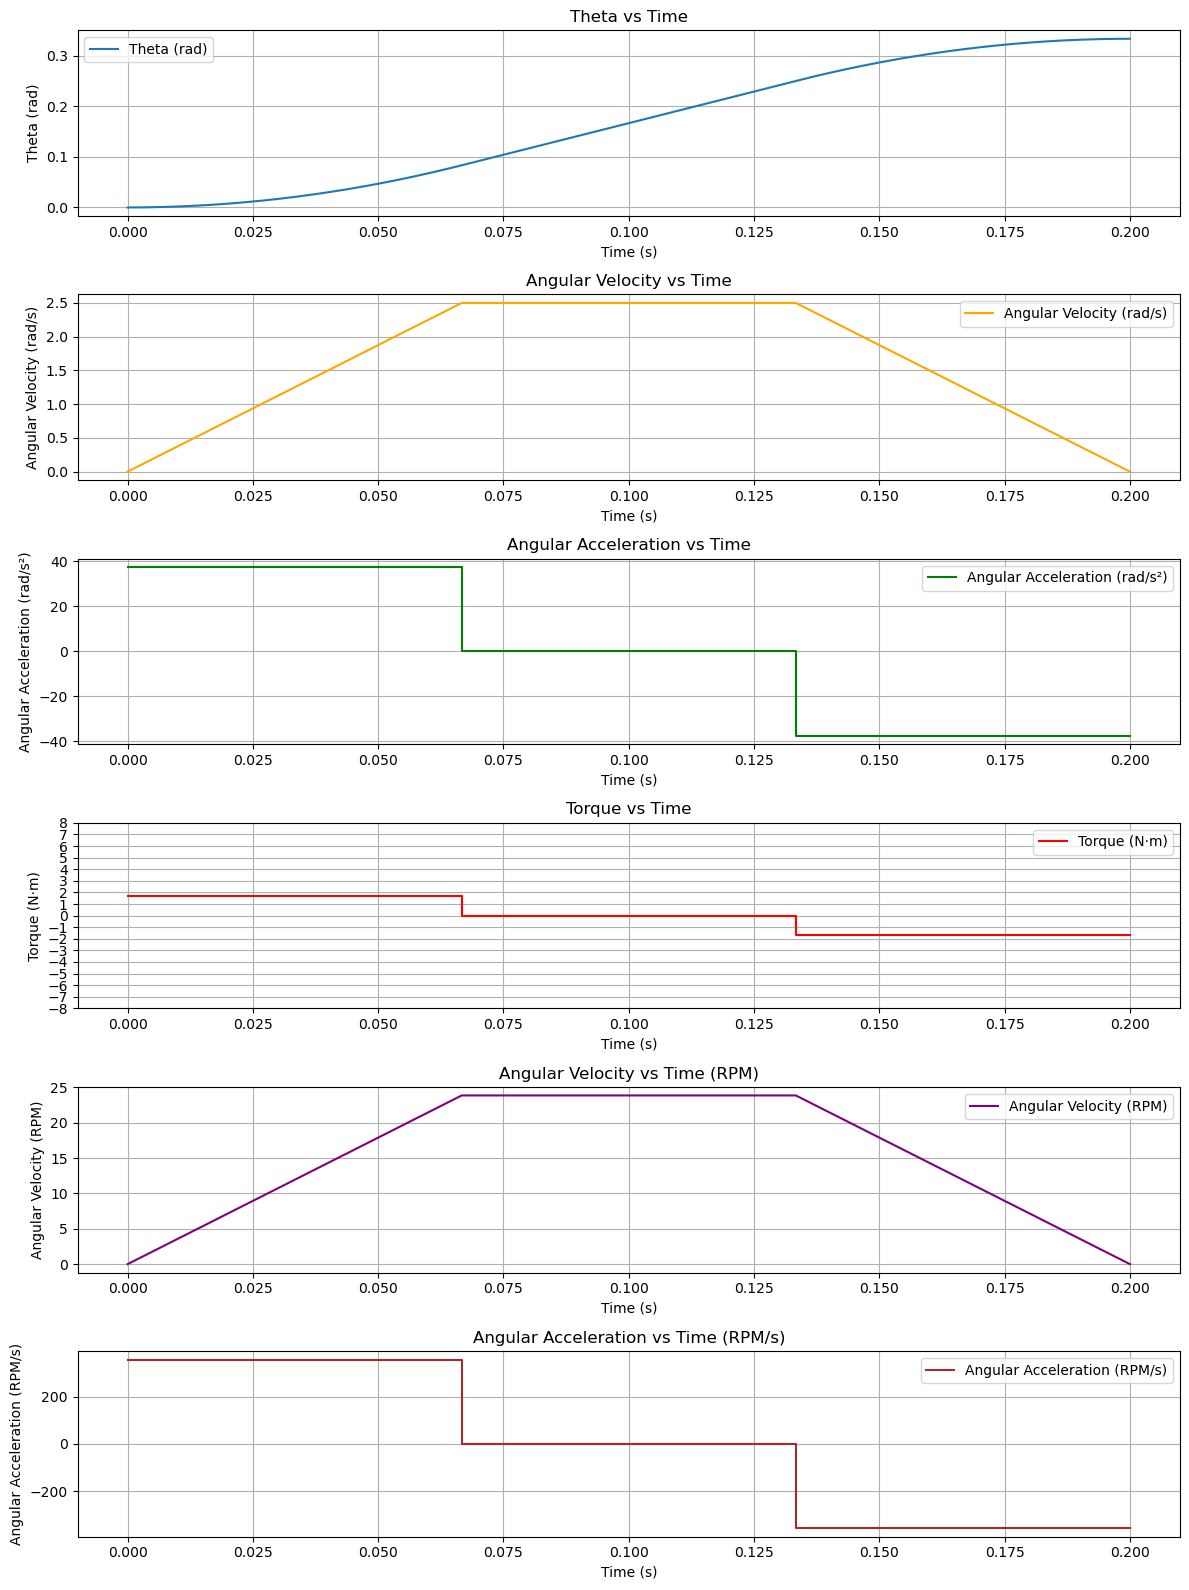

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# Inputs
object_inertia = 0.02939190548 # kg/m^2
motor_inertia = 0.0000713309
theta_target = 0.8
time_window = 0.2
safety_factor = 1.5

print(f'Time for motion: {time_window} \nMovment Angle(rad): {theta_target} \nSafety Factor: {safety_factor}')
# Calculations
total_inertia = (object_inertia + motor_inertia)*safety_factor # Total moment of inertia
time_segment = time_window / 3  # Each phase duration: acceleration, constant velocity, deceleration

# Trapezoidal motion parameters
angular_acceleration = theta_target / (time_segment * time_window)  # Required angular acceleration
angular_velocity_max = angular_acceleration * time_segment  # Maximum angular velocity

# Time points
t_accel = np.linspace(0, time_segment, 100)  # Acceleration phase
t_const = np.linspace(time_segment, 2 * time_segment, 100)  # Constant velocity phase
t_decel = np.linspace(2 * time_segment, time_window, 100)  # Deceleration phase

# Angular acceleration
alpha_accel = np.full_like(t_accel, angular_acceleration)
alpha_const = np.zeros_like(t_const)
alpha_decel = np.full_like(t_decel, -angular_acceleration)

alpha = np.concatenate([alpha_accel, alpha_const, alpha_decel])
time = np.concatenate([t_accel, t_const, t_decel])

# Angular velocity
omega_accel = angular_acceleration * t_accel
omega_const = np.full_like(t_const, angular_velocity_max)
omega_decel = angular_velocity_max + (-angular_acceleration) * (t_decel - 2 * time_segment)

omega = np.concatenate([omega_accel, omega_const, omega_decel])

# Angular position (theta)
theta_accel = 0.5 * angular_acceleration * t_accel**2
theta_const = theta_accel[-1] + angular_velocity_max * (t_const - time_segment)
theta_decel = (
    theta_const[-1]
    + angular_velocity_max * (t_decel - 2 * time_segment)
    + 0.5 * (-angular_acceleration) * (t_decel - 2 * time_segment)**2
)

theta = np.concatenate([theta_accel, theta_const, theta_decel])

# Torque
torque = total_inertia * alpha

# Convert to RPM and RPM/s
omega_rpm = omega * (60 / (2 * np.pi))  # Angular velocity in RPM
alpha_rpm_s = alpha * (60 / (2 * np.pi))  # Angular acceleration in RPM/s

# Plot results
plt.figure(figsize=(12, 16))

# Plot theta vs time
plt.subplot(6, 1, 1)
plt.plot(time, theta, label="Theta (rad)")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title("Theta vs Time")
plt.grid()
plt.legend()

# Plot angular velocity vs time (rad/s)
plt.subplot(6, 1, 2)
plt.plot(time, omega, label="Angular Velocity (rad/s)", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Angular Velocity vs Time")
plt.grid()
plt.legend()

# Plot angular acceleration vs time (rad/s²)
plt.subplot(6, 1, 3)
plt.plot(time, alpha, label="Angular Acceleration (rad/s²)", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Angular Acceleration (rad/s²)")
plt.title("Angular Acceleration vs Time")
plt.grid()
plt.legend()


plt.subplot(6, 1, 4)
plt.plot(time, torque, label="Torque (N·m)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Torque (N·m)")
plt.title("Torque vs Time")
plt.grid()
plt.legend()

# Define y-ticks manually
yticks = np.linspace(-8, 8, 17)  # Create 11 evenly spaced ticks from 0 to 5
plt.yticks(yticks)

# Plot angular velocity vs time (RPM)
plt.subplot(6, 1, 5)
plt.plot(time, omega_rpm, label="Angular Velocity (RPM)", color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (RPM)")
plt.title("Angular Velocity vs Time (RPM)")
plt.grid()
plt.legend()

# Plot angular acceleration vs time (RPM/s)
plt.subplot(6, 1, 6)
plt.plot(time, alpha_rpm_s, label="Angular Acceleration (RPM/s)", color='brown')
plt.xlabel("Time (s)")
plt.ylabel("Angular Acceleration (RPM/s)")
plt.title("Angular Acceleration vs Time (RPM/s)")
plt.grid()
plt.legend()
plt.tight_layout()


# Save figure with timestamp
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"trapezoidal_motion_{timestamp}.png"
plt.savefig(filename)
#print(f"Figure saved as {filename}")

plt.show()




Figure saved as triangle_motion_2025-03-24_00-36-03.png


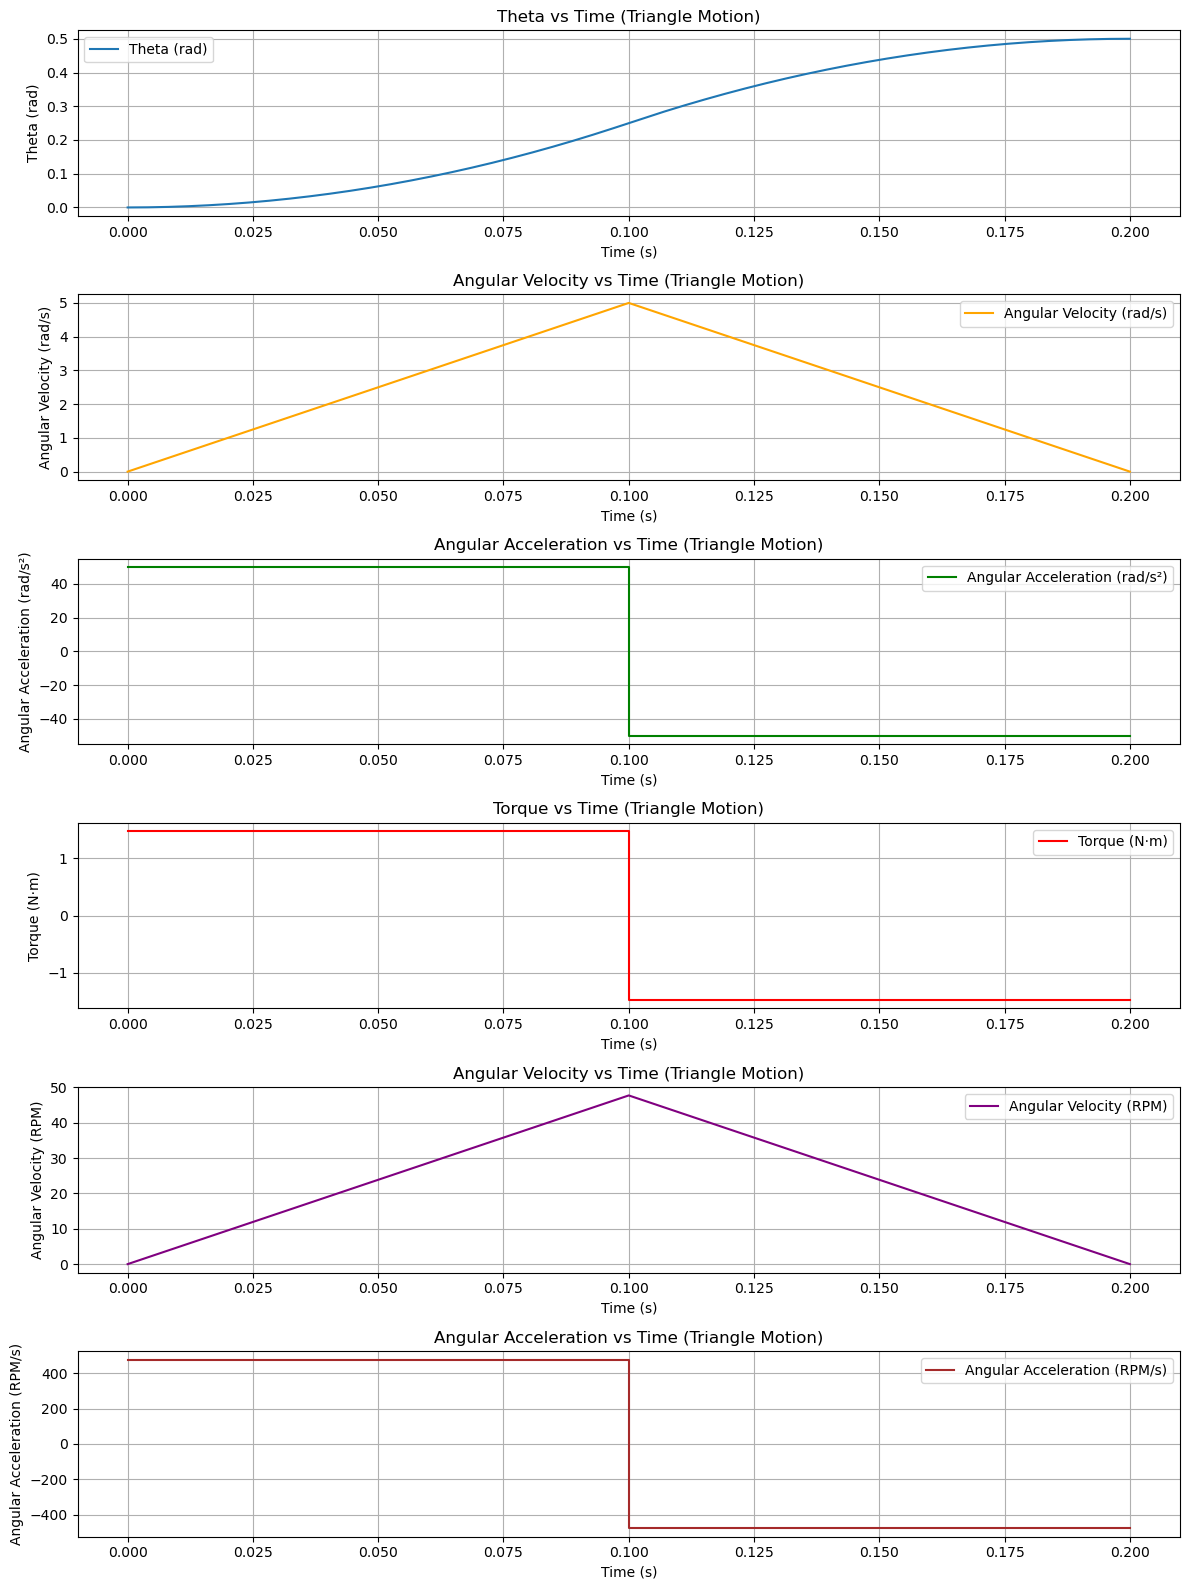

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Inputs
object_inertia = 0.029376955
motor_inertia = 0.00002
theta_target = 0.5
time_window = 0.2
print(f'Time for motion: {time_window} \nMovment Angle(rad): {theta_target} \nSafety Factor: {safety_factor}')

# Calculations
total_inertia = object_inertia + motor_inertia  # Total moment of inertia
time_half = time_window / 2  # Each phase duration: acceleration and deceleration

# Triangular motion parameters
angular_acceleration = (2 * theta_target) / (time_window * time_half)  # Required angular acceleration
angular_velocity_max = angular_acceleration * time_half  # Maximum angular velocity

# Time points
t_accel = np.linspace(0, time_half, 100)  # Acceleration phase
t_decel = np.linspace(time_half, time_window, 100)  # Deceleration phase

# Angular acceleration
alpha_accel = np.full_like(t_accel, angular_acceleration)
alpha_decel = np.full_like(t_decel, -angular_acceleration)

alpha = np.concatenate([alpha_accel, alpha_decel])
time = np.concatenate([t_accel, t_decel])

# Angular velocity
omega_accel = angular_acceleration * t_accel
omega_decel = angular_velocity_max + (-angular_acceleration) * (t_decel - time_half)

omega = np.concatenate([omega_accel, omega_decel])

# Angular position (theta)
theta_accel = 0.5 * angular_acceleration * t_accel**2
theta_decel = (
    theta_accel[-1]
    + angular_velocity_max * (t_decel - time_half)
    + 0.5 * (-angular_acceleration) * (t_decel - time_half)**2
)

theta = np.concatenate([theta_accel, theta_decel])

# Torque
torque = total_inertia * alpha

# Convert to RPM and RPM/s
omega_rpm = omega * (60 / (2 * np.pi))  # Angular velocity in RPM
alpha_rpm_s = alpha * (60 / (2 * np.pi))  # Angular acceleration in RPM/s

# Plot results
plt.figure(figsize=(12, 16))

# Plot theta vs time
plt.subplot(6, 1, 1)
plt.plot(time, theta, label="Theta (rad)")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title("Theta vs Time (Triangle Motion)")
plt.grid()
plt.legend()

# Plot angular velocity vs time (rad/s)
plt.subplot(6, 1, 2)
plt.plot(time, omega, label="Angular Velocity (rad/s)", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Angular Velocity vs Time (Triangle Motion)")
plt.grid()
plt.legend()

# Plot angular acceleration vs time (rad/s²)
plt.subplot(6, 1, 3)
plt.plot(time, alpha, label="Angular Acceleration (rad/s²)", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Angular Acceleration (rad/s²)")
plt.title("Angular Acceleration vs Time (Triangle Motion)")
plt.grid()
plt.legend()

# Plot torque vs time
plt.subplot(6, 1, 4)
plt.plot(time, torque, label="Torque (N·m)", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Torque (N·m)")
plt.title("Torque vs Time (Triangle Motion)")
plt.grid()
plt.legend()

# Plot angular velocity vs time (RPM)
plt.subplot(6, 1, 5)
plt.plot(time, omega_rpm, label="Angular Velocity (RPM)", color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (RPM)")
plt.title("Angular Velocity vs Time (Triangle Motion)")
plt.grid()
plt.legend()

# Plot angular acceleration vs time (RPM/s)
plt.subplot(6, 1, 6)
plt.plot(time, alpha_rpm_s, label="Angular Acceleration (RPM/s)", color='brown')
plt.xlabel("Time (s)")
plt.ylabel("Angular Acceleration (RPM/s)")
plt.title("Angular Acceleration vs Time (Triangle Motion)")
plt.grid()
plt.legend()

plt.tight_layout()

# Save figure with timestamp
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"triangle_motion_{timestamp}.png"
plt.savefig(filename)
#print(f"Figure saved as {filename}")

plt.show()
